# <font color="#8333ff">Projet 5 (PARTIE 1): Segmentez des clients d'un site e-commerce

# <font color="#8333ff"> Problématique, Cleaning effectué, Feature engineering et Analyse exploratoire

Je suis  consultante pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Olist souhaite que je fournisse à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

**Objectif** : Comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

**Livrable** : Description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

**Contenu de la base de données** : Des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

**Mission** : aider les équipes d’Olist à comprendre les différents types d'utilisateurs, avec des méthodes non supervisées pour regrouper des clients de profils similaires. 


**Attention** : seuls 3 % des clients du fichier de données partagé avec vous ont réalisé plusieurs commandes.

Dans un deuxième temps, une fois le modèle de segmentation choisi, Olist souhaite que je fasse une 
recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de 
pouvoir effectuer un devis de contrat de maintenance.

Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

# <font color="#8333ff"> Partie 1: Analyse exploratoire </font>

## <font color="blue">Sommaire</font>

1. [Import des librairies nécessaires pour l'exploration des données](#section_1)        
2. [Chargement de la base de données](#section_2)              
3. [Description des bases de données](#section_3) </br>
4. [Fusion des bases de données](#section_4) </br>
5. [Traitement des valeurs manquantes et des outliers](#section_5) </br>
6. [Analyse des variables](#section_6) </br>
    a.[Distributions des variables numériques](#section_6_a)</br>
    b.[Répartitions des variables catégorielles](#section_6_b)</br>
    c.[Corrélation](#section_7_c)</br>
7. [Segmentation RFM](#section_7) </br>
    a.[Conversion des scores RFM en une seule variable](#section_7_a)</br>
    b.[Segmentation des clients à l'aide du score RFM](#section_7_b)</br>
    c.[Interprétation des statistiques descriptives des segments](#section_7_c)</br>
    d.[Visualisation des segments de clients](#section_7_d)</br>

## <font color="red" id="section_1">1. Import des librairies nécessaires pour l'exploration des données</font>

In [1]:
#import des librairies dont nous aurons besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <font color="red" id="section_2">2. Chargement de la base de données</font>

In [2]:
# Lecture des fichiers 
data_sellers = pd.read_csv('olist_sellers_dataset.csv')
data_category = pd.read_csv('product_category_name_translation.csv')
data_products = pd.read_csv('olist_products_dataset.csv')
data_Order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_orders = pd.read_csv('olist_orders_dataset.csv')
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
data_customers = pd.read_csv('olist_customers_dataset.csv')      

In [3]:
#on montre toutes les colonnes et lignes
pd.set_option("max_columns", None) 
pd.set_option("max_rows", None)

#suppression des messages d'avertissement
import warnings
warnings.filterwarnings('ignore')

## <font color="red" id="section_3">3. Description des bases de données</font>

In [4]:
#Regardons le nombre de lignes et colonnes des dataframes
data_name =[data_sellers,
data_category,
data_products,
data_Order_reviews,
data_orders,
data_order_payments,
data_order_items,
data_geolocation,
data_customers]
data_sellers.name='data_sellers'
data_category.name='data_category'
data_products.name='data_products'
data_Order_reviews.name='data_Order_reviews'
data_orders.name='data_orders'
data_order_payments.name='data_order_payments'
data_order_items.name='data_order_items'
data_geolocation.name='data_geolocation'
data_customers.name='data_customers'
for data in data_name :
    print("le nombre de lignes et colonnes de", data.name," est de",data.shape)

le nombre de lignes et colonnes de data_sellers  est de (3095, 4)
le nombre de lignes et colonnes de data_category  est de (71, 2)
le nombre de lignes et colonnes de data_products  est de (32951, 9)
le nombre de lignes et colonnes de data_Order_reviews  est de (99224, 7)
le nombre de lignes et colonnes de data_orders  est de (99441, 8)
le nombre de lignes et colonnes de data_order_payments  est de (103886, 5)
le nombre de lignes et colonnes de data_order_items  est de (112650, 7)
le nombre de lignes et colonnes de data_geolocation  est de (1000163, 5)
le nombre de lignes et colonnes de data_customers  est de (99441, 5)


In [5]:
for data in data_name :
    print ('\033[1m' +"l entete de ",data.name,"est :" + '\033[0m')
    display(data.head(2))

l entete de  data_sellers est :


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


l entete de  data_category est :


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


l entete de  data_products est :


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


l entete de  data_Order_reviews est :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


l entete de  data_orders est :


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


l entete de  data_order_payments est :


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


l entete de  data_order_items est :


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


l entete de  data_geolocation est :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


l entete de  data_customers est :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [6]:
for data in data_name :
    print ('\033[1m' +"les types de variables de ",data.name,"sont :" + '\033[0m')
    print(data.dtypes)

les types de variables de  data_sellers sont :
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object
les types de variables de  data_category sont :
product_category_name            object
product_category_name_english    object
dtype: object
les types de variables de  data_products sont :
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object
les types de variables de  data_Order_reviews sont :
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
revi

**Modification des types avec les "bons" types**

In [7]:
data_Order_reviews['review_creation_date']=data_Order_reviews['review_creation_date'].astype('datetime64')
data_Order_reviews['review_answer_timestamp']=data_Order_reviews['review_creation_date'].astype('datetime64')
data_orders['order_purchase_timestamp']=data_orders['order_purchase_timestamp'].astype('datetime64')
data_orders['order_delivered_carrier_date']=data_orders['order_delivered_carrier_date'].astype('datetime64')
data_orders['order_delivered_customer_date']=data_orders['order_delivered_customer_date'].astype('datetime64')
data_orders['order_estimated_delivery_date']=data_orders['order_estimated_delivery_date'].astype('datetime64')
data_orders['order_approved_at']=data_orders['order_approved_at'].astype('datetime64')
data_order_items['shipping_limit_date']=data_order_items['shipping_limit_date'].astype('datetime64')

## <font color="red" id="section_4">4. Fusion des bases de données</font>

Il semble que les dataframes ont des id en commun, nous pouvons donc procéder à une fusion des bases de données.

Commençons par concaténer "data_orders", "data_Order_reviews", "data_order_payments","data_order_items".
Vérifions d'abord que "order_id" a bien des id en commun dans ces 4 dataframes.

In [8]:
#On vérifie la présence de doublons dans chacune des bases
data_list=[data_orders, data_Order_reviews, data_order_payments,data_order_items]
for data in data_list:
    print ('\033[1m' +"Nombre de doublons de ",data.name,":" + '\033[0m')
    print(print(data.duplicated().sum()))

Nombre de doublons de  data_orders :
0
None
Nombre de doublons de  data_Order_reviews :
0
None
Nombre de doublons de  data_order_payments :
0
None
Nombre de doublons de  data_order_items :
0
None


Il n'y a pas de doublons dans ces 4 dataframes.</br>
Regardons le nombre de doublons pour l'identifiant "order_id". En effet, un client peut avoir plusieurs commandes.

In [9]:
#On vérifie que les id se répetent
for data in data_list:
    print ('\033[1m' +"Nombre de doublons de order_id pour ",data.name,":" + '\033[0m')
    print(print(data.duplicated(subset='order_id').sum()))

Nombre de doublons de order_id pour  data_orders :
0
None
Nombre de doublons de order_id pour  data_Order_reviews :
551
None
Nombre de doublons de order_id pour  data_order_payments :
4446
None
Nombre de doublons de order_id pour  data_order_items :
13984
None


In [10]:
#On vérifie que les id sont bien uniques maintenant
for data in data_list:
    print ('\033[1m' +"Nombre de doublons de order_id pour ",data.name,":" + '\033[0m')
    print(print(data.duplicated(subset='order_id').sum()))

Nombre de doublons de order_id pour  data_orders :
0
None
Nombre de doublons de order_id pour  data_Order_reviews :
551
None
Nombre de doublons de order_id pour  data_order_payments :
4446
None
Nombre de doublons de order_id pour  data_order_items :
13984
None


In [11]:
#concaténation des dataframes à l'aide de l' order_id
data_order = pd.merge(data_orders, data_Order_reviews,
                  on = "order_id", 
                  how = "inner")
data_order = pd.merge(data_order,data_order_payments ,
                  on = "order_id", 
                  how = "inner")
data_order = pd.merge(data_order, data_order_items,
                  on = "order_id", 
                  how = "inner")

In [12]:
data_order.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-11,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-11,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-11,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-18,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-03,1,credit_card,1,72.20,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-17,1,credit_card,1,28.62,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,89b738e70a1ce346db29a20fb2910161,4,NaN,NaN,2017-07-27,2017-07-27,1,credit_card,6,175.26,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,e07549ef5311abcc92ba1784b093fb56,2,NaN,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13,1,credit_card,1,65.95,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-0

In [13]:
#statistiques descriptives sur les variables des 4 dataframes
data_order.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,117329,117329,117329,117329,117314,116094,114858,117329,117329,117329.000000,13892,49679,117329,117329,117329.000000,117329,117329.000000,117329.000000,117329.000000,117329,117329,117329,117329.000000,117329.000000
unique,97916,97916,7,97370,89533,80449,95021,449,97708,NaN,4497,35691,632,632,NaN,4,NaN,NaN,NaN,32789,3090,92642,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-12-19 00:00:00,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN
freq,63,63,114859,63,63,63,63,652,63,NaN,494,259,542,542,NaN,86520,NaN,NaN,NaN,533,2128,63,NaN,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN,NaN,NaN,NaN,2016-10-15 00:00:00,2016-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.031467,NaN,NaN,NaN,NaN,1.094452,NaN,2.940151,172.062565,1.194121,NaN,NaN,NaN,120.524349,20.027514
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.387927,NaN,NaN,NaN,NaN,0.731174,NaN,2.775370,265.388194,0.684225,NaN,NaN,NaN,182.944843,15.828077
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,60.750000,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [14]:
#concaténation de data_order et de data _sellers à l'aide de "seller_id"
data = pd.merge(data_order, data_sellers,
                  on = "seller_id", 
                  how = "inner")
#concaténation de data avec data_customers à l'aide de "customer_id"
data = pd.merge(data,data_customers ,
                  on = "customer_id", 
                  how = "inner")
#concaténation de data avec data_products à l'aide de "product_id"
data = pd.merge(data, data_products,
                  on = "product_id", 
                  how = "inner")
#concaténation de data avec data_category à l'aide de "product_category_name"
data = pd.merge(data, data_category,
                  on = "product_category_name",
                  how = "inner")

Nous n'allons pas exploiter les données sur latitude et longitude present dans la dataframe de la geolocalisation. 
Les informations sur la ville et le nom du vendeur, ainsi que ceux du client sont présents déjà dans notre dataframe 
"data". 

## <font color="red" id="section_5">5. Traitement des valeurs manquantes et des outliers</font>

In [15]:
#statistiques descriptives de data
data.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,115609,115609,115609,115609,115595,114414,113209,115609,115609,115609.000000,13801,48906,115609,115609,115609.000000,115609,115609.000000,115609.000000,115609.000000,115609,115609,115609,115609.000000,115609.000000,115609.000000,115609,115609,115609,115609.000000,115609,115609,115609,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609
unique,96516,96516,7,95989,88332,79241,93702,449,96319,NaN,4477,35176,632,632,NaN,4,NaN,NaN,NaN,32171,3028,91386,NaN,NaN,NaN,604,23,93396,NaN,4093,27,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-12-19 00:00:00,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,sao paulo,SP,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,63,113210,63,63,63,63,649,63,NaN,489,253,531,531,NaN,85278,NaN,NaN,NaN,533,2128,63,NaN,NaN,NaN,28811,82417,75,NaN,18267,48797,11847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11847
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN,NaN,NaN,NaN,2016-10-15 00:00:00,2016-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.034409,NaN,NaN,NaN,NaN,1.093747,NaN,2.946233,172.387379,1.194535,NaN,NaN,NaN,120.619850,20.056880,24515.713958,NaN,NaN,NaN,35061.537597,NaN,NaN,NaN,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.385584,NaN,NaN,NaN,NaN,0.729849,NaN,2.781087,265.873969,0.685926,NaN,NaN,NaN,182.653476,15.836184,27636.640968,NaN,NaN,NaN,29841.671732,NaN,NaN,NaN,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000,1001.000000,NaN,NaN,NaN,1003.000000,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,60.870000,1.000000,NaN,NaN,NaN,39.900000,13.080000,6429.000000,NaN,NaN,NaN,11310.000000,NaN,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN


In [16]:
#Regardons le nombre de lignes et de colonnes pour la dataframe obtenue après concaténation
data.shape

(115609, 40)

Voyons le nombre de valeurs manquantes par variable.

In [17]:
data.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
seller_zip_code_prefix                0


In [18]:
#pourcentage de valeurs manquantes dans la dataframe
# Nombre total de valeurs manquantes de data
val_manquantes = data.isnull().sum().sum()
print(val_manquantes)
#Pourcentage de valeurs manquantes par rapport aux nombres de cellules de la dataframe
pourc_val_manquantes = val_manquantes/(len(data)*len(data.columns))*100
pourc_val_manquantes

172124


3.722115060246175

Il y a donc 3,72 % de valeurs manquantes dans la dataframe.

<AxesSubplot:>

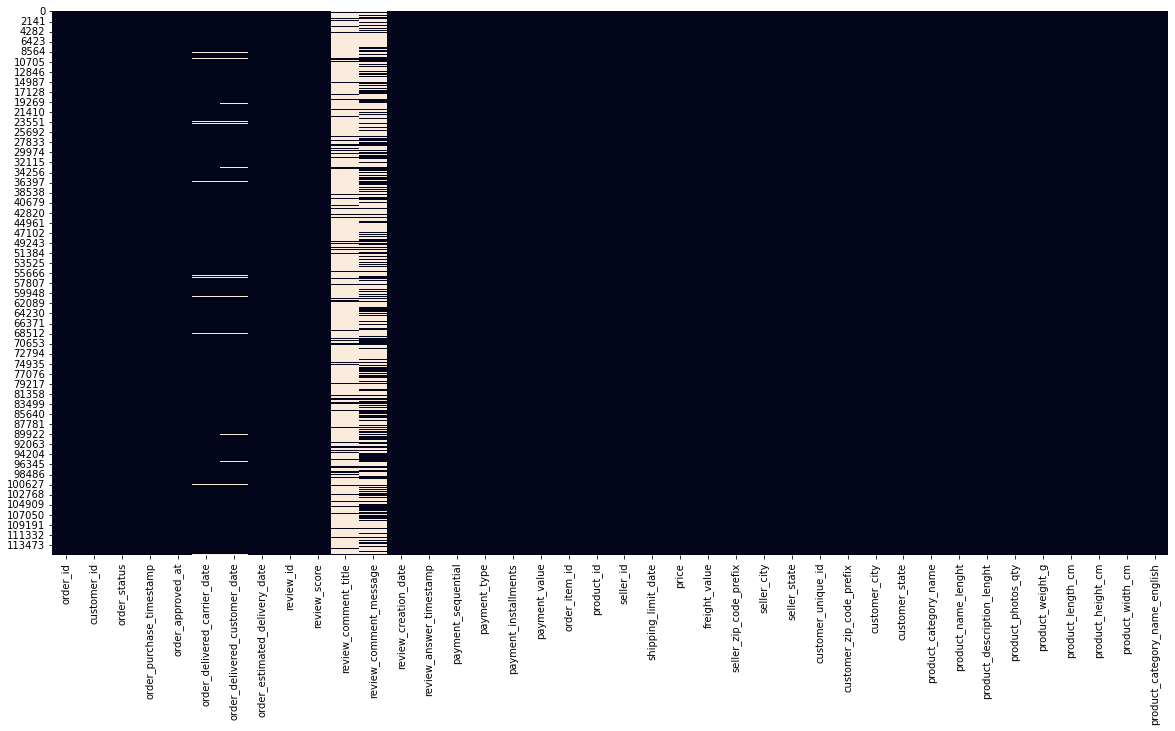

In [19]:
#on affiche une heatmap de seaborn pour visualiser les valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False)

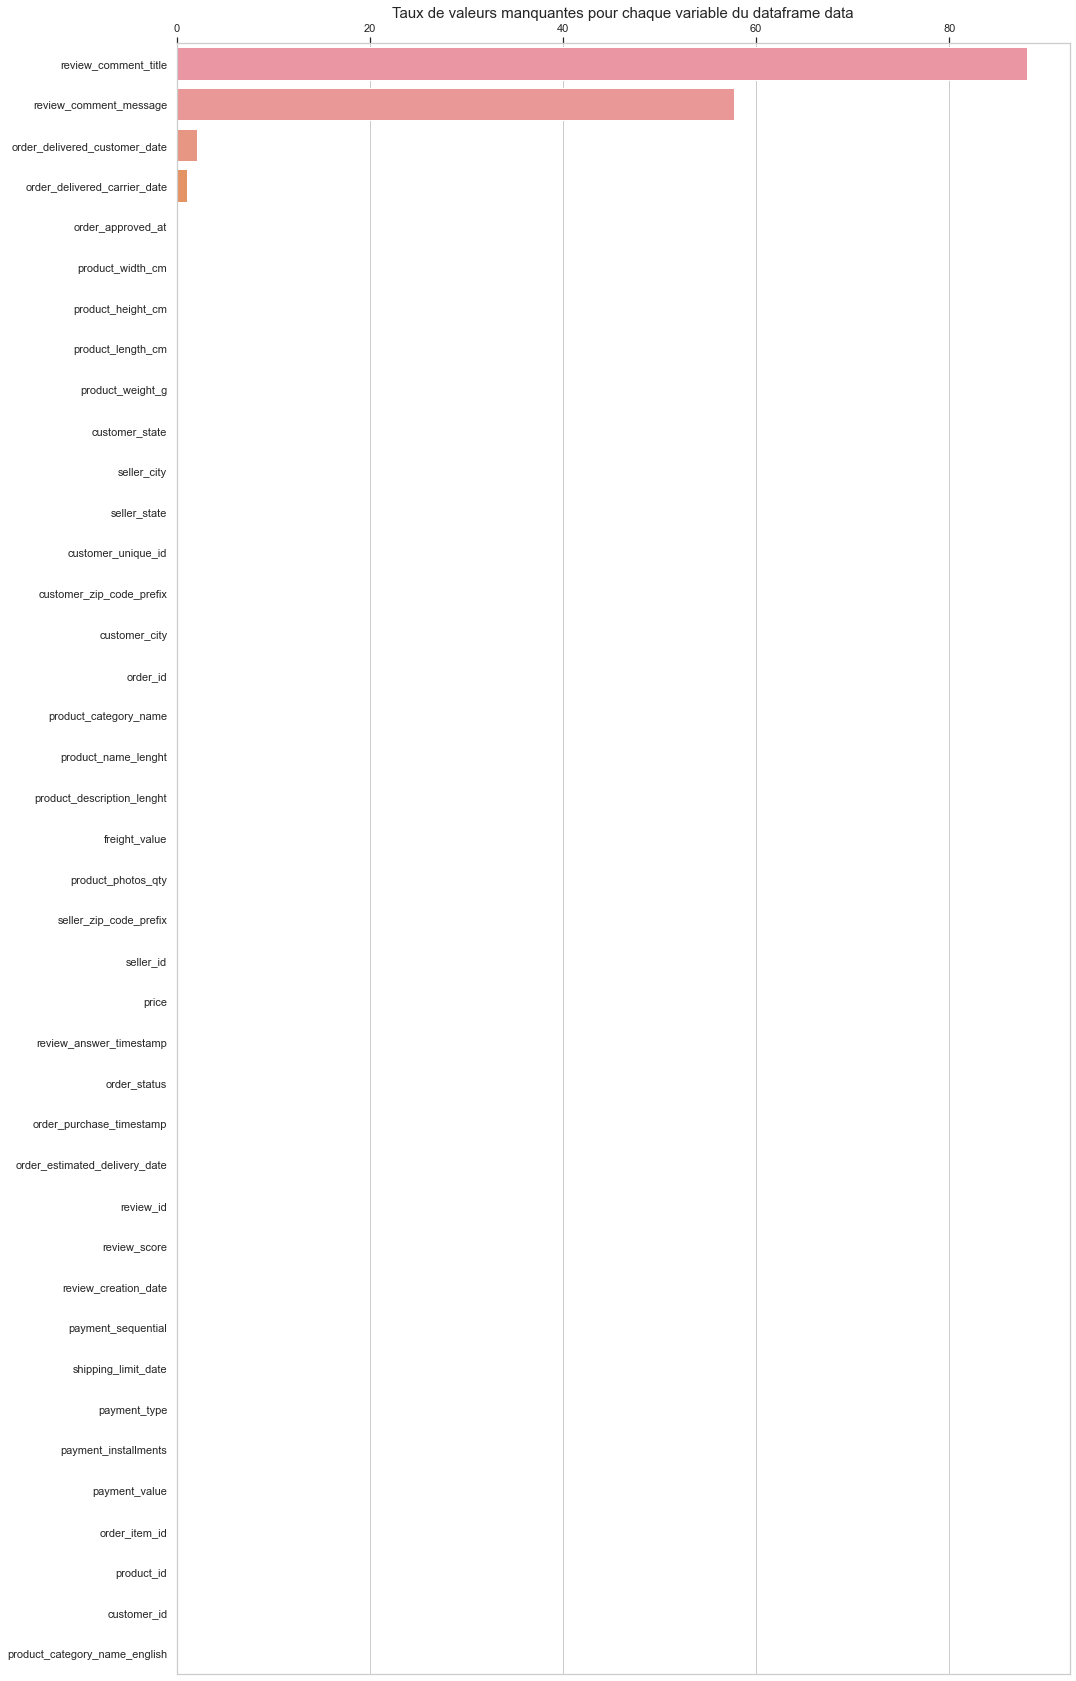

In [20]:
#calcul du pourcentage de donnés manquantes  

#taille utilisé pour le graphique
size = data.shape
#valeurs manquantes pour chaque variable de la dataframe
nan_values = data.isna().sum()
#calcul du pourcentage de données manquantes
nan_values = nan_values*100/size[0]
#On trie les pourcentages par ordre croissant
nan_values = nan_values.sort_values(ascending=False)
#on configure le graphique
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = nan_values.index, x=nan_values.values)
ax.xaxis.set_ticks_position('top')
plt.title('Taux de valeurs manquantes pour chaque variable du dataframe data', size=15)
plt.show()

### <font color="blue" id="section_5_a">a. Traitement des valeurs manquantes et feature engineering</font>

Nous allons supprimer les 2 variables qui concernent les commentaires des avis (trop de valeurs manquantes).
Pour les valeurs manquantes des caractéristiques des produits, nous allons les remplacer par 0.

In [21]:
#Nous allons supprimer les commentaires de notre data
liste=['review_comment_title','review_comment_message']
data=data.drop(data[liste], axis=1)    

In [22]:
data['product_category_name_english'].value_counts()

bed_bath_table                             11847
health_beauty                               9944
sports_leisure                              8942
furniture_decor                             8743
computers_accessories                       8105
housewares                                  7331
watches_gifts                               6161
telephony                                   4692
garden_tools                                4558
auto                                        4356
toys                                        4246
cool_stuff                                  3964
perfumery                                   3575
baby                                        3178
electronics                                 2827
stationery                                  2607
fashion_bags_accessories                    2159
pet_shop                                    2020
office_furniture                            1773
consoles_games                              1180
luggage_accessories 

In [23]:
#Nous allons grouper les catégories de produits dans des plus grandes familles pour plus de facilité par la suite
categories = {
#catégorie faisant référence à l'art
'art' : 'art',
'cine_photo':'art',
'arts_and_craftmanship':'art',
#catégorie faisant référence à l'automobile
'auto':'auto',
#catégorie faisant référence au monde des bébés, et enfants
'baby':'baby_ kids',
'toys':'baby_ kids',
'diapers_and_hygiene':'baby_ kids',
#catégorie englobant la nourriture et la boisson
'food_drink':'food_drink',
'market_place':'food_drink',
'food':'food_drink',
'drinks':'food_drink',
#catégorie faisant référence à la santé et beauté
'health_beauty':'health_beauty',
'perfumery':'health_beauty',
#catégorie faisant référence à la maison (déco, ameublement, jardin...)
'bed_bath_table':'home',
'furniture_decor':'home',
'housewares':'home',
'kitchen_dining_laundry_garden_furniture':'home',
'home_appliances':'home',
'home_confort':'home',
'furniture_mattress_and_upholstery':'home',
'home_construction':'home',
'furniture_living_room':'home',
'home_appliances_2':'home',
'la_cuisine':'home',
'home_comfort_2':'home',
'small_appliances_home_oven_and_coffee':'home',
'flowers':'home',
#catégorie faisant référence à l'industrie et au commerce
'agro_industry_and_commerce':'industry_commerce',
'industry_commerce_and_business':'industry_commerce',
#catégorie faisant référence à la mode
'fashion_bags_accessories':'fashion',
'fashion_shoes':'fashion',
'luggage_accessories':'fashion',
'fashion_male_clothing':'fashion',
'fashion_underwear_beach':'fashion',
'fashion_sport':'fashion',
'fashio_female_clothing':'fashion',
'fashion_childrens_clothes':'fashion',
#catégorie faisant référence au bureau/papeterie/livres
'stationery':'office_stationery_books',
'office_furniture':'office_stationery_books',
'books_technical':'office_stationery_books',
'books_general_interest':'office_stationery_books',
'books_imported':'office_stationery_books',
#catégorie faisant référence aux animaux
'pet_shop':'pet_shop',
#catégorie faisant référence à la sécurité
'signaling_and_security':'security',
'security_and_services':'security',
#catégorie faisant référence aux sports et loisirs
'sports_leisure':'sports_leisure',
'cool_stuff':'sports_leisure',
'musical_instruments':'sports_leisure',
'music':'sports_leisure',
#catégorie faisant référence aux provisions et cadeaux
'party_supplies':'supplies',
'christmas_supplies':'supplies',
#catégorie faisant référence à la technology
'computers_accessories':'technology',
'telephony':'technology',
'watches_gifts':'technology',
'tablets_printing_image':'technology',
'fixed_telephony':'technology',
'small_appliances':'technology',
'consoles_games':'technology',
'audio':'technology',
'air_conditioning':'technology',
'electronics':'technology',
'computers':'technology',
'cds_dvds_musicals':'technology',
'dvds_blu_ray':'technology',
#catégorie faisant référence aux outils de construction ou de jardinage
'garden_tools':'tools',
'construction_tools_construction':'tools',
'costruction_tools_garden':'tools',
'costruction_tools_tools':'tools',
'construction_tools_lights':'tools',
'construction_tools_safety':'tools'
}

#On remplace les noms des produits par catégories par leur famille de catégories
data['product_category_name_english'] = data['product_category_name_english'].map(categories)

In [24]:
data['product_category_name_english'].value_counts()

home                       31130
technology                 24993
sports_leisure             13658
health_beauty              13519
baby_ kids                  7463
tools                       6359
office_stationery_books     5272
auto                        4356
fashion                     3967
pet_shop                    2020
food_drink                  1515
industry_commerce            521
art                          315
security                     201
supplies                     194
Name: product_category_name_english, dtype: int64

In [25]:
#Calcul du temps entre livraison estimée et la livraison réelle
data['order_time_delivered'] = (data['order_estimated_delivery_date'] - data['order_delivered_customer_date'])


In [26]:
type(data['order_time_delivered'])

pandas.core.series.Series

Nous allons conserver seulement le nombre de jours où les clients ont reçu leurs commandes.
Lorsqu'elle est positive, le client a reçu sa commande en avance.
Lorsqu'elle est négative, il l'a reçu en retard.

In [27]:
data['order_time_delivered'] =(data['order_time_delivered']).dt.days

In [28]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_time_delivered'],
      dtype='object')

In [29]:
#selection des variables à conserver dans la base de données
select_var = ['customer_id', 'customer_unique_id',
              'customer_city','customer_state',
              'order_id', 'order_status', 'order_purchase_timestamp',
               'order_approved_at', 'order_delivered_carrier_date',
               'order_delivered_customer_date', 'order_estimated_delivery_date',
               'review_id', 'review_score', 'payment_sequential', 'payment_type',
               'payment_installments', 'payment_value', 
                'shipping_limit_date','product_id', 'price', 'freight_value',
               'product_category_name_english', 'order_time_delivered']
data=data[select_var]

In [62]:
#statistiques descriptives de data
data.describe(include="all")

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,product_id,price,freight_value,product_category_name_english,order_time_delivered
count,115609,115609,115609,115609,115609,115609,115609,115595,114414,113209,115609,115609,115609.000000,115609.000000,115609,115609.000000,115609.000000,115609,115609,115609.000000,115609.000000,115483,113209.000000
unique,96516,93396,4093,27,96516,7,95989,88332,79241,93702,449,96319,NaN,NaN,4,NaN,NaN,91386,32171,NaN,NaN,15,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,NaN,credit_card,NaN,NaN,2017-08-14 20:43:31,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,home,NaN
freq,63,75,18267,48797,63,113210,63,63,63,63,649,63,NaN,NaN,85278,NaN,NaN,63,533,NaN,NaN,31130,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.034409,1.093747,NaN,2.946233,172.387379,NaN,NaN,120.619850,20.056880,NaN,11.092351
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.385584,0.729849,NaN,2.781087,265.873969,NaN,NaN,182.653476,15.836184,NaN,10.090815
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.850000,0.000000,NaN,-189.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,1.000000,60.870000,NaN,NaN,39.900000,13.080000,NaN,6.000000


In [63]:
data.shape

(115609, 23)

In [64]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
review_id                           0
review_score                        0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
shipping_limit_date                 0
product_id                          0
price                               0
freight_value                       0
product_category_name_english     126
order_time_delivered             2400
dtype: int64

## <font color="red" id="section_6">6. Analyse des variables </font>

### <font color="blue" id="section_6_a">a. Distributions des variables numériques </font>

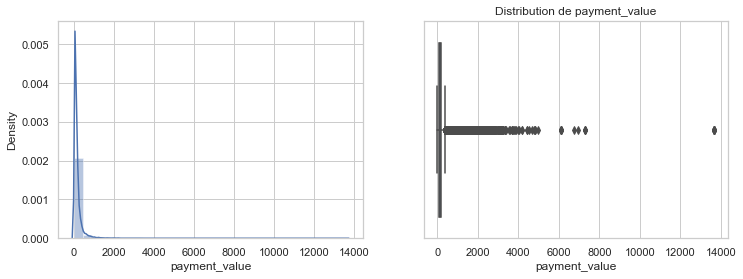

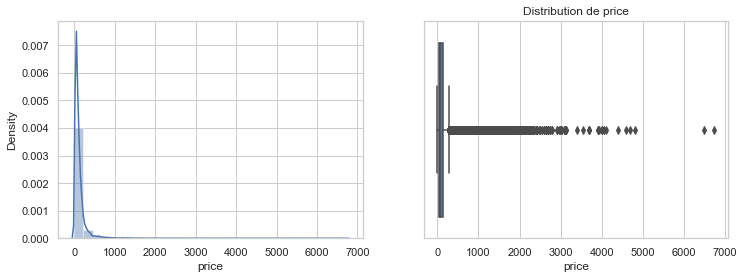

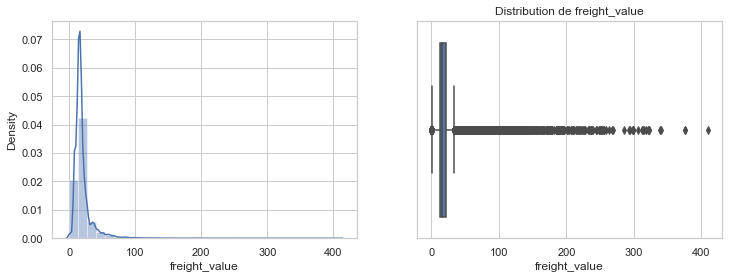

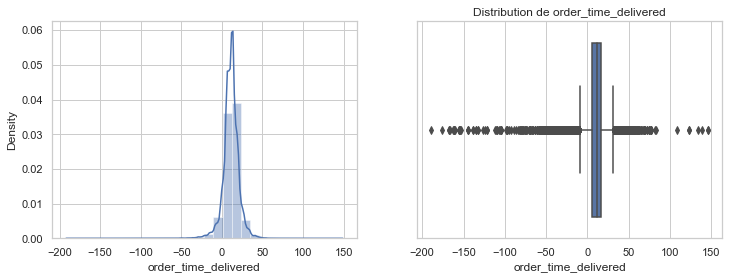

In [31]:
for column in data.select_dtypes(['int32', 'float64']).columns:
    f, axes = plt.subplots(1,2, figsize=(12,4))
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.distplot(data[column], bins=30, ax=axes[0])
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.boxplot(data[column], ax=axes[1])
    plt.show()

On constate qu'il y a beaucoup de valeurs nulles et la présence de valeurs extrêmes.


### <font color="blue" id="section_6_b">b. Répartitions des variables catégorielles </font>

<AxesSubplot:title={'center':'Les 10 états avec le plus de clients'}, ylabel='customer_state'>

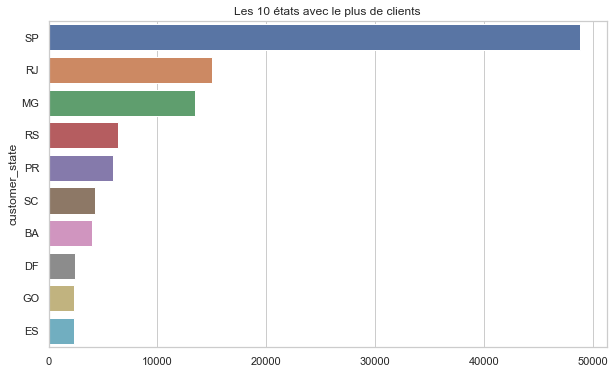

In [32]:
state = data.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 états avec le plus de clients')
sns.barplot(x = state.values,
           y = state.index)

<AxesSubplot:title={'center':'Les 10 villes avec le plus de clients'}, ylabel='customer_city'>

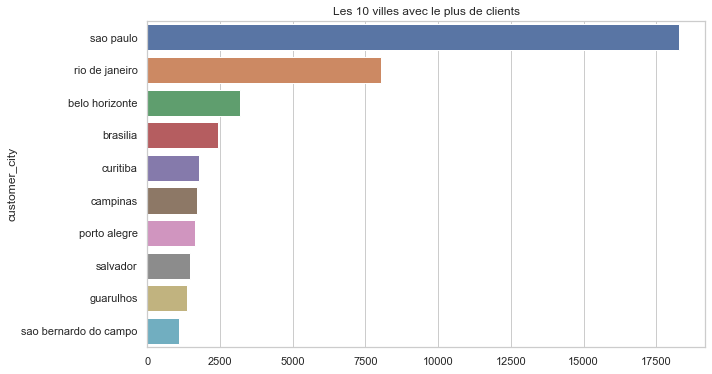

In [33]:
cities = data.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 villes avec le plus de clients')
sns.barplot(x = cities.values,
           y = cities.index)

<AxesSubplot:title={'center':'Répartition des catégories les plus achetées par les clients'}, ylabel='product_category_name_english'>

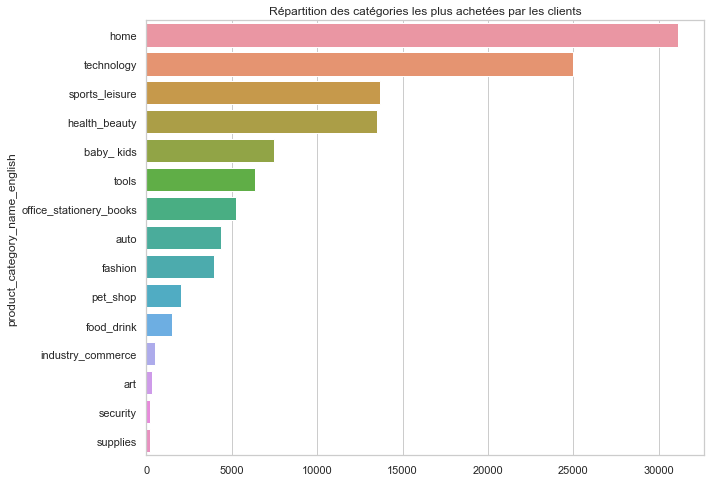

In [34]:
categories = data.groupby(['product_category_name_english']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Répartition des catégories les plus achetées par les clients')
sns.barplot(x = categories.values,
           y = categories.index)

<AxesSubplot:title={'center':'Répartition des moyens de paiement plébiscités par les clients'}, ylabel='payment_type'>

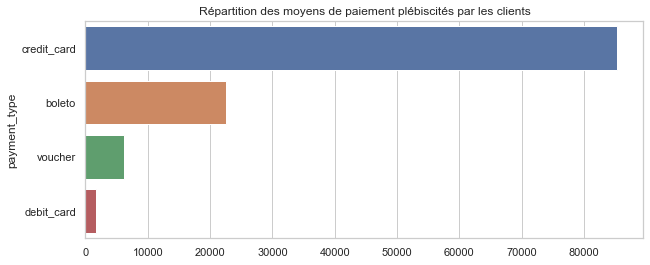

In [35]:
payment = data.groupby(['payment_type']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Répartition des moyens de paiement plébiscités par les clients')
sns.barplot(x = payment.values,
           y = payment.index)

### <font color="blue" id="section_6_c">c. Corrélation </font>

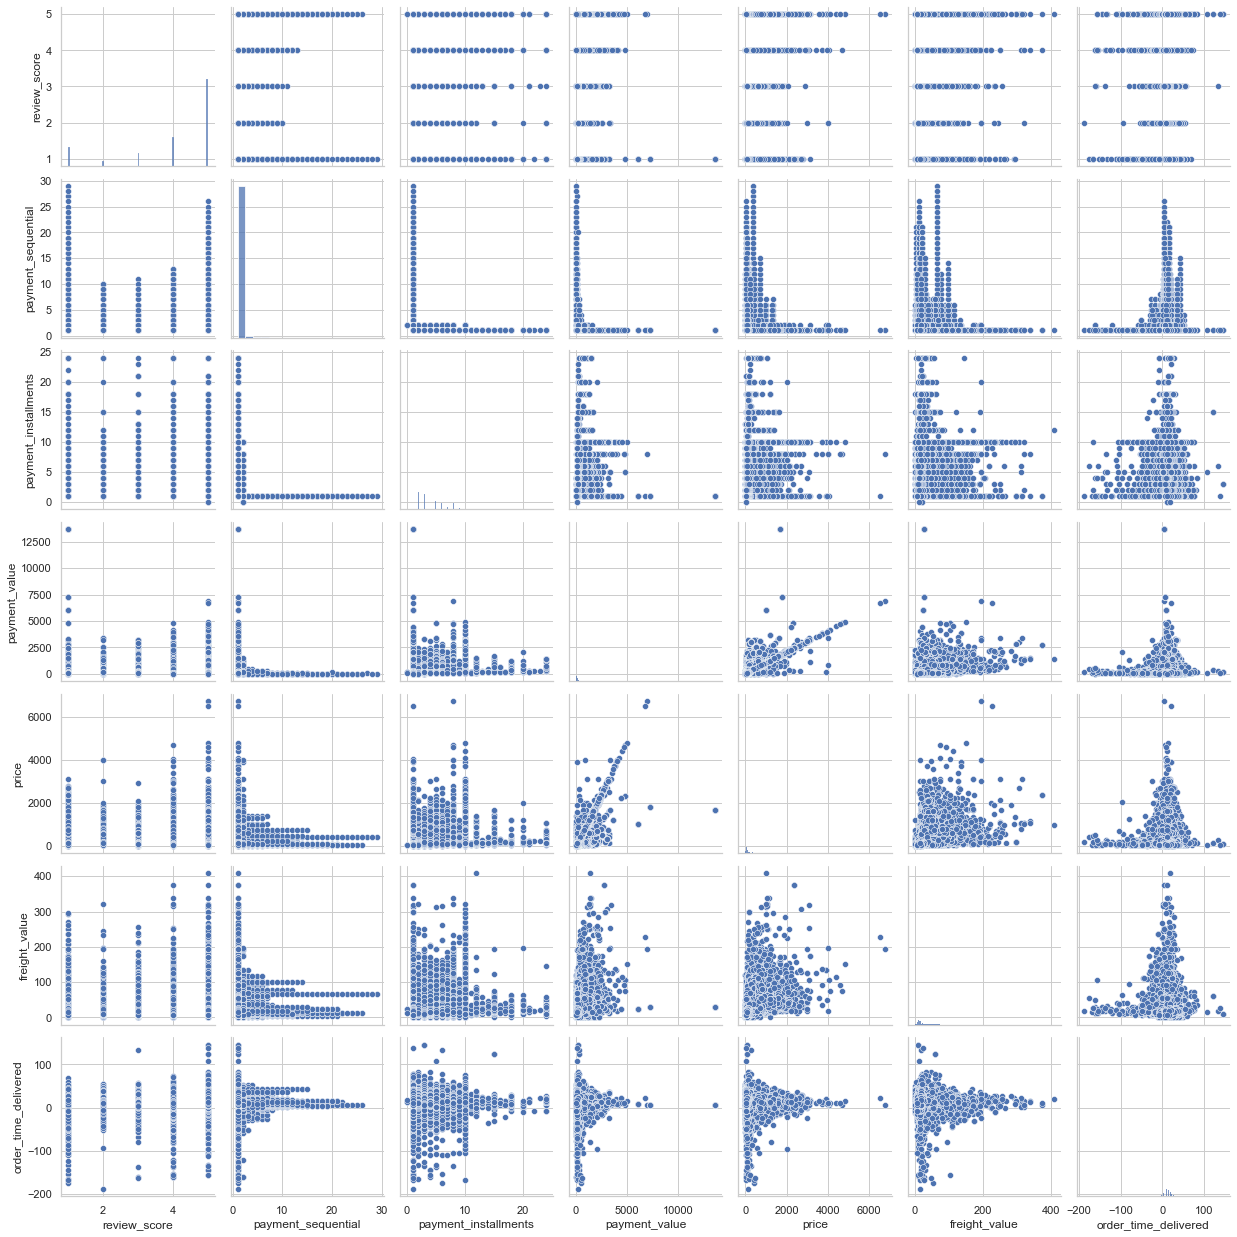

In [36]:
sns.pairplot(data)

<AxesSubplot:>

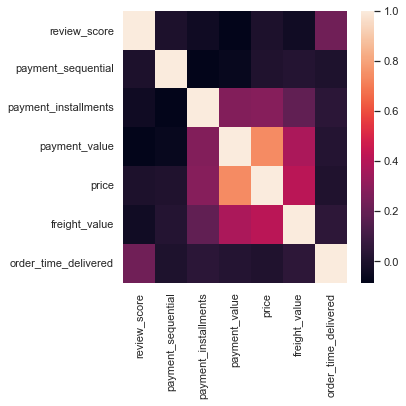

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())

## Nombre de clients et d'achats par client

Nous allons regarder le nombre de clients total présent dans notre dataframe.

In [38]:
nb_clients = data.customer_unique_id.unique().shape[0]
print("Le nombre de clients est de : {} ".format(nb_clients))

Le nombre de clients est de : 93396 


Regardons maintenant le nombre d'achat unique par client.

In [39]:
#On créer une data dans laquelle le "customer_unique_id" n'apparait qu'une seule fois
data_unique = data.groupby("customer_unique_id").filter(lambda x: len(x) == 1)
#on regarde le nombre de ligne dans lequel "customer_unique_id" est unique
achat_unique = data_unique.customer_unique_id.unique().shape[0]
print("Il y a {} clients qui ont eu 1 seul achat.".format(achat_unique))


Il y a 79377 clients qui ont eu 1 seul achat.


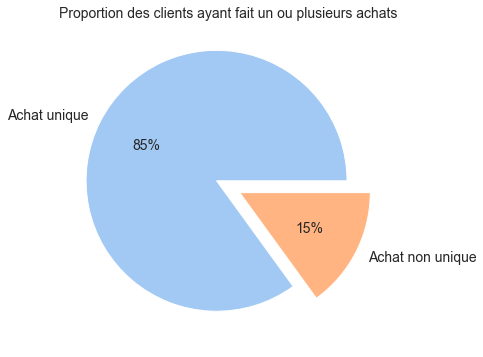

In [40]:
plt.figure(figsize=(6, 6))
achat_non_unique = nb_clients - achat_unique
data_achat = [achat_unique, achat_non_unique]
labels = ["Achat unique","Achat non unique"]

colors = sns.color_palette('pastel')

plt.pie(data_achat, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 14},pctdistance=0.6,explode=[0.1]*2)
plt.title("Proportion des clients ayant fait un ou plusieurs achats",fontsize=14)
plt.show()

## <font color="red" id="section_7">7. Segmentation RFM </font>

RFM permet de segmenter sa base clients selon l’intention d’achat et de les cibler efficacement.

L'analyse RFM est construite sur le comportement du client :

- Quand le client a-t-il acheté la dernière fois ?
- À quelle fréquence achète-t-il ?
- Quel montant d'achat dépense-t-il ?

La segmentation RFM prend en compte **la Récence** (date de la dernière commande), **la Fréquence des commandes**, 
et **le Montant** (total des commandes ici).
Calculons donc tous ses éléments.

Nous allons ainsi identifier plusieurs typologies de clients (les champions, les très bons clients, les bons clients…) et les séparer complètement des clients inactifs.

In [41]:
data.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,product_id,price,freight_value,product_category_name_english,order_time_delivered
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,1,credit_card,1,18.12,2017-10-06 11:07:15,87285b34884572647811a353c7ac498a,29.99,8.72,home,7.0
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,3,voucher,1,2.00,2017-10-06 11:07:15,87285b34884572647811a353c7ac498a,29.99,8.72,home,7.0
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,2,voucher,1,18.59,2017-10-06 11:07:15,87285b34884572647811a353c7ac498a,29.99,8.72,home,7.0
3,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,b46f1e34512b0f4c74a72398b03ca788,4,1,credit_card,3,37.77,2017-08-21 20:05:16,87285b34884572647811a353c7ac498a,29.99,7.78,home,9.0
4,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,dc90f19c2806f1abba9e72ad3c350073,5,1,credit_card,1,37.77,2017-08-08 18:37:31,87285b34884572647811a353c7ac498a,29.99,7.78,home,7.0


In [42]:
import datetime
most_recent=data['order_purchase_timestamp'].max().date()
most_recent

datetime.date(2018, 9, 3)

In [66]:
#Division des données en groupe et aggrégation pour la segmentation RFM
rfm = data.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (most_recent - date.max().date()).days,
                                     'order_id': lambda num: num.nunique(),
                                     'price': lambda price: price.sum()})

#On renomme les colonnes
rfm.rename(columns={'order_purchase_timestamp': 'recency',
                     'order_id':'frequency',
                     'price': 'monetary'}, inplace=True) 
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,93396.0,242.645349,153.165352,0.00,119.0,223.0,352.0,729.0
frequency,93396.0,1.033406,0.208235,1.00,1.0,1.0,1.0,15.0
monetary,93396.0,149.307681,248.478581,0.85,48.9,89.9,159.9,13440.0


In [73]:
rfm.describe(percentiles=[0.10,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
recency,93396.0,242.645349,153.165352,0.00,46.0,119.0,223.0,352.0,471.0,581.0,729.0
frequency,93396.0,1.033406,0.208235,1.00,1.0,1.0,1.0,1.0,1.0,2.0,15.0
monetary,93396.0,149.307681,248.478581,0.85,26.5,48.9,89.9,159.9,299.0,1100.0,13440.0


### Ajout de ses nouvelles variables dans notre base data ###

In [67]:
#concaténation de data_order et de data _sellers à l'aide de "seller_id"
data_clustering = pd.merge(rfm, data,
                  on = "customer_unique_id", 
                  how = "inner")
data_clustering.head(100)

,customer_unique_id,recency,frequency,monetary,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,product_id,price,freight_value,product_category_name_english,order_time_delivered
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,fadbb3709178fc513abc1b2670aa1ad2,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21,13359f48c3c7e41a2b8afca340937eeb,5,1,credit_card,8,141.90,2018-05-15 11:11:18,372645c7439f9661fbbacfd129aa92ec,129.90,12.00,home,4.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4cb282e167ae9234755102258dd52ee8,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15,e383e10e36a765f04f752a37c1674e43,4,1,credit_card,1,27.19,2018-05-11 17:56:33,5099f7000472b634fea8304448d20825,18.90,8.29,health_beauty,4.0
2,0000f46a3911fa3c0805444483337064,542,1,69.00,9b3932a6253894a02c1df9d19004239f,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07,d89cb4217c23008b141e66c3160de8a4,3,1,credit_card,8,86.22,2017-03-15 21:05:03,64b488de448a5324c4134ea39c28a34b,69.00,17.22,office_stationery_books,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,914991f0c02ef0843c0e7010c819d642,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13,6f22e4ad2cd9e0d40c5842e4787b4321,4,1,credit_card,4,43.62,2017-10-18 21:49:17,2345a354a6f2033609bbf62bf5be9ef6,25.99,17.63,technology,11.0
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,47227568b10f5f58a524a75507e6992c,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05,880a77e7dd4e496969f138f974cc44a1,5,1,credit_card,6,196.89,2017-11-22 20:06:52,c72e18b3fe2739b8d24ebf3102450f37,180.00,16.89,technology,7.0
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,154.00,4a913a170c26e3c8052ed0202849b5a8,sao paulo,SP,3e470077b690ea3e3d501cffb5e0c499,delivered,2018-04-05 19:33:16,2018-04-05 19:48:59,2018-04-07 00:38:52,2018-04-07 16:12:43,2018-04-19,09f0931c60418e8c0ba6cac5658a7b28,4,1,credit_card,8,166.98,2018-04-11 19:48:59,25cf184645f3fae66083bf33581b8f13,154.00,12.98,tools,11.0
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,27.99,d2509c13692836fc0449e88cf9eb4858,campinas,SP,d0028facea13f508e880202d7097a5a1,delivered,2018-04-20 12:57:23,2018-04-25 03:51:13,2018-04-25 15:25:00,2018-04-27 12:08:59,2018-05-09,ffc1a4080d67b1d3d06749f4f2d3ee59,4,1,boleto,1,35.38,2018-05-02 03:51:13,8cefe1c6f2304e7e6825150218ffc58c,27.99,7.39,technology,11.0
7,00053a61a98854899e70ed204dd4bafe,187,1,382.00,a81ebb9b32f102298c0c89635b4b3154,curitiba,PR,44e608f2db00c74a1fe329de44416a4e,delivered,2018-02-28 11:15:41,2018-02-28 11:32:42,2018-03-01 20:09:30,2018-03-16 19:02:51,2018-03-26,333a6ca3cdb01f5f00e3e6be1f1236e1,1,1,credit_card,3,419.18,2018-03-06 11:30:57,62984ea1bba7fcea1f5b57084d3bf885,191.00,18.59,sports_leisure,9.0
8,00053a61a98854899e70ed204dd4bafe,187,1,382.00,a81ebb9b32f102298c0c89635b4b3154,curitiba,PR,44e608f2db00c74a1fe329de44416a4e,delivered,2018-02-28 11:15:41,2018-02-28 11:32:42,2018-03-01 20:09:30,2018-03-16 19:02:51,2018-03-26,333a6ca3cdb01f5f00e3e6be1f1236e1,1,1,credit_card,3,419.18,2018-03-06 11:30:57,58727e154e8e85d84052cd22b0136c84,191.00,18.59,sports_leisure,9.0
9,0005e1862207bf6ccc02e4228effd9a0,548,1,135.00,3b37fb626fdf46cd99d37ec62afa88ff,teresopolis,RJ,ae76bef74b97bcb0b3e355e60d9a6f9c,delivered,2017-03-04 23:32:12,2017-03-04 23:43:26,2017-03-06 05:14:07,2017-03-09 08:33:08,2017-04-06,6b298d209aa5d83663c18cf6fa0be2ff,4,1,credit_card,3

In [68]:
data.shape

(115609, 23)

In [69]:
data_clustering.shape

(115609, 26)

In [70]:
data_clustering.columns

Index(['customer_unique_id', 'recency', 'frequency', 'monetary', 'customer_id',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'shipping_limit_date', 'product_id', 'price',
       'freight_value', 'product_category_name_english',
       'order_time_delivered'],
      dtype='object')

In [71]:
#Export de la dataframe
data_clustering.to_csv('data_clustering.csv')